In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.3.1


In [2]:
# fashion_mnist 데이터 파일 불러오기
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

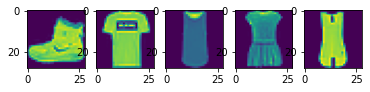

In [3]:
# data 살펴보기
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    
plt.show()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

0~1 사이의 값으로 정규화 및 data출력

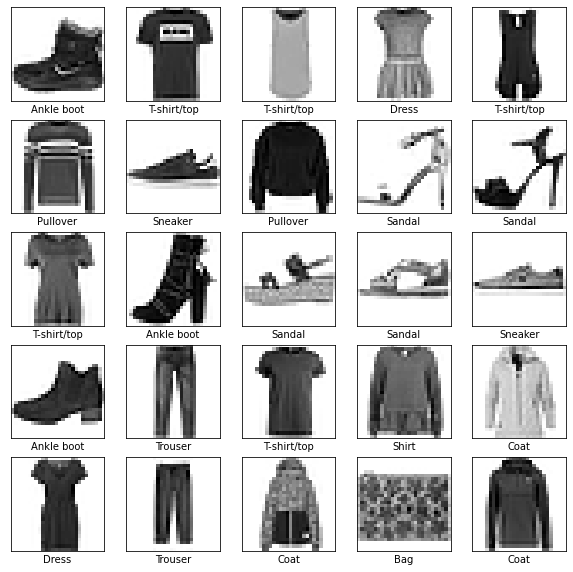

In [5]:
x_train = x_train/255
x_test = x_test/255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [6]:
# keras 모델 정의
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # 10 개의 클래스로 분류
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

- Adam Optimizer과 Cross Entropy Loss 선언

- 5 Epoch로 학습할 Data로 학습 수행

In [8]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 421us/step - loss: 0.5064 - accuracy: 0.8233
Epoch 2/50
1875/1875 [==============================] - 1s 432us/step - loss: 0.3787 - accuracy: 0.8635
Epoch 3/50
1875/1875 [==============================] - 1s 445us/step - loss: 0.3410 - accuracy: 0.8754
Epoch 4/50
1875/1875 [==============================] - 1s 448us/step - loss: 0.3136 - accuracy: 0.8853
Epoch 5/50
1875/1875 [==============================] - 1s 451us/step - loss: 0.2938 - accuracy: 0.8918
Epoch 6/50
1875/1875 [==============================] - 1s 447us/step - loss: 0.2810 - accuracy: 0.8959
Epoch 7/50
1875/1875 [==============================] - 1s 450us/step - loss: 0.2694 - accuracy: 0.9001
Epoch 8/50
1875/1875 [==============================] - 1s 450us/step - loss: 0.2579 - accuracy: 0.9050
Epoch 9/50
1875/1875 [==============================] - 1s 449us/step - loss: 0.2499 - accuracy: 0.9063
Epoch 10/50
1875/1875 [==============================] - 1s 451u

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 328us/step - loss: 0.5116 - accuracy: 0.8869
Test accuracy: 0.886900007724762
